# CREDIT CARD FRAUD DETECTION

## Importing libraries

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.patches as mpatches

import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedShuffleSplit, StratifiedKFold, ShuffleSplit, learning_curve, cross_val_predict, RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, recall_score, precision_score, f1_score, roc_curve, accuracy_score, precision_recall_curve, roc_auc_score

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

from collections import Counter

## Exploratory Data Analysis & Preprocessing

In [2]:
dt=pd.read_csv("../data/raw/creditcard.csv")
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dt.isnull().sum().max()

np.int64(0)

No missing values.

In [6]:
print(round(dt['Class'].value_counts()[0]/len(dt) * 100,2), '% of the dataset is not a fraud transaction.')
print(round(dt['Class'].value_counts()[1]/len(dt) * 100,2), '% of the dataset is a fraud transaction.')

99.83 % of the dataset is not a fraud transaction.
0.17 % of the dataset is a fraud transaction.


Heavily unbalanced.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud v. s. 1: Fraud)')

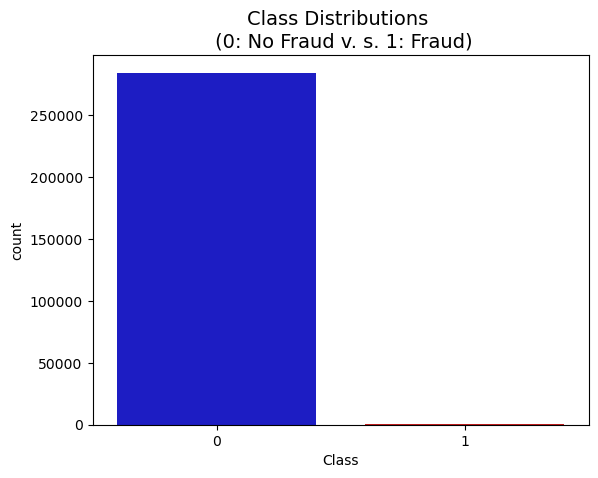

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(
    data=dt,
    x='Class',
    hue='Class',     
    palette=colors,
    legend=False          
)

plt.title('Class Distributions \n (0: No Fraud v. s. 1: Fraud)', fontsize=14)

From the distribution we can observe how skewed it is.

In [8]:
dt["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

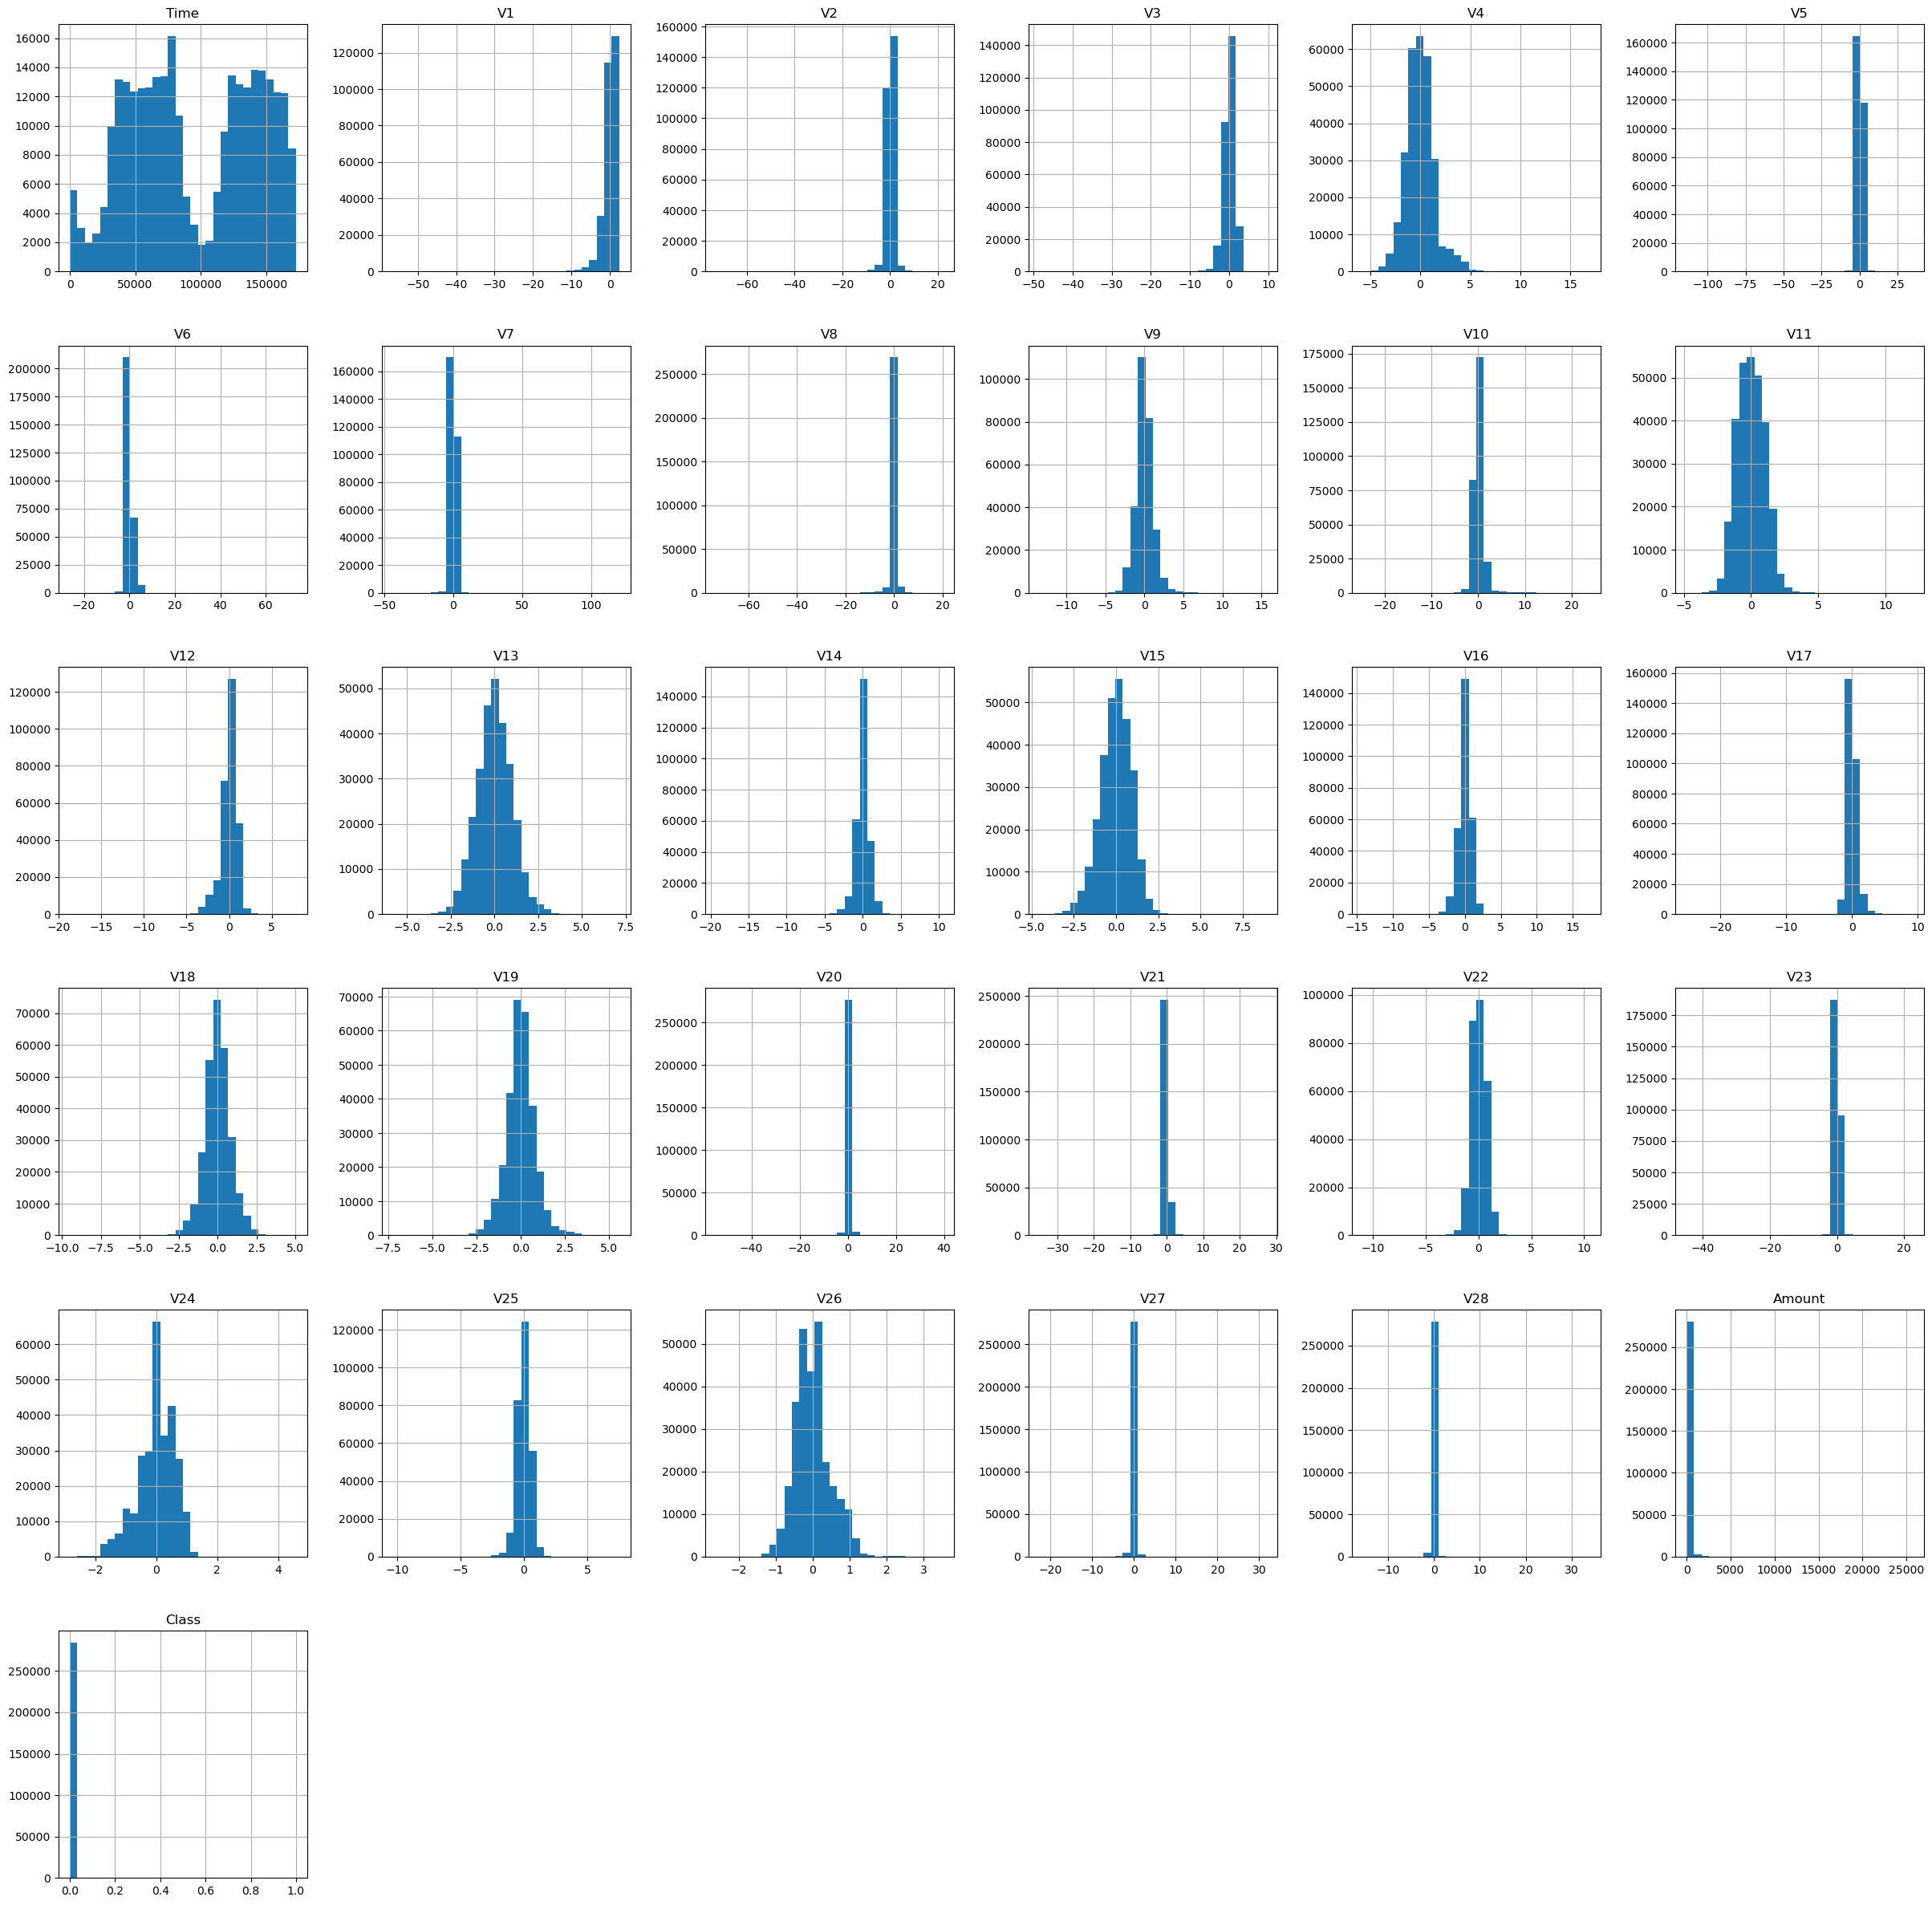

In [9]:
dt.hist(bins=30,figsize=(30,30));

In [10]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dt['scaled_amount'] = rob_scaler.fit_transform(dt['Amount'].values.reshape(-1,1))
dt['scaled_time'] = rob_scaler.fit_transform(dt['Time'].values.reshape(-1,1))

dt.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
scaled_amount = dt['scaled_amount']
scaled_time = dt['scaled_time']

dt.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dt.insert(0, 'scaled_amount', scaled_amount)
dt.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dt.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
print('No Frauds', round(dt['Class'].value_counts()[0]/len(dt) * 100,2), '% of the dataset.')
print('Frauds', round(dt['Class'].value_counts()[1]/len(dt) * 100,2), '% of the dataset.')

X = dt.drop('Class', axis=1)
y = dt["Class"]

sss=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#loop throught the folds and perfotm the actual splitting 
for train_index, test_index in sss.split(X,y): # row indices of the current fold
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtest.to_csv('../data/splits/Xtest.csv', index=False)
original_ytest.to_csv('../data/splits/ytest.csv', index=False)

# Turn from dataframe to Numpy array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
#checks how many class labels in each and counts them 

print('\n')
print('Label Distributions:') # check if both train and test label distribution are similarly distributed
print(train_counts_label/ len(original_ytrain)) # number of each class labels over total number if samples 
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset.
Frauds 0.17 % of the dataset.
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


Label Distributions:
[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [13]:
dt = dt.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_dt = dt.loc[dt['Class'] == 1]
non_fraud_dt = dt.loc[dt['Class'] == 0][:492] #slice at 492

normal_distributed_dt = pd.concat([fraud_dt, non_fraud_dt])

# Shuffle dataframe rows
new_dt = normal_distributed_dt.sample(frac=1, random_state=42)

new_dt.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
88420,-0.167680,-0.265041,-3.293850,-3.847285,2.911934,2.030124,3.498663,-2.018612,-2.941702,0.475823,...,1.428114,0.300738,-0.024110,0.504881,0.054312,0.137201,0.576438,-0.215004,-0.060797,0
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
149961,0.368895,0.088970,-0.814107,0.618277,2.236761,-0.358145,0.020167,-0.130097,0.410286,0.044768,...,0.143463,-0.310775,-0.777961,-0.058100,0.022047,0.057278,0.371599,-0.045215,0.052859,0
263274,-0.296653,0.894959,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,1
68067,6.957312,-0.374511,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,...,1.230278,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,1


Distribution of the Classes in the sub-sample dataset:
Class
0    0.5
1    0.5
Name: count, dtype: float64


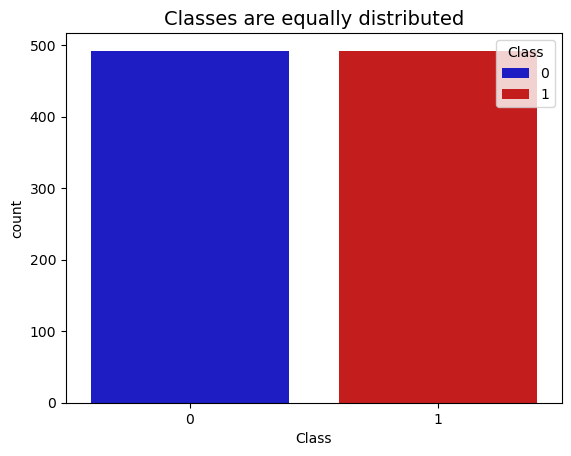

In [14]:
print("Distribution of the Classes in the sub-sample dataset:")
print(new_dt['Class'].value_counts()/len(new_dt)) #equally distributed

sns.countplot(x='Class', data=new_dt, hue='Class', palette=colors)
plt.title('Classes are equally distributed', fontsize=14)
plt.show()

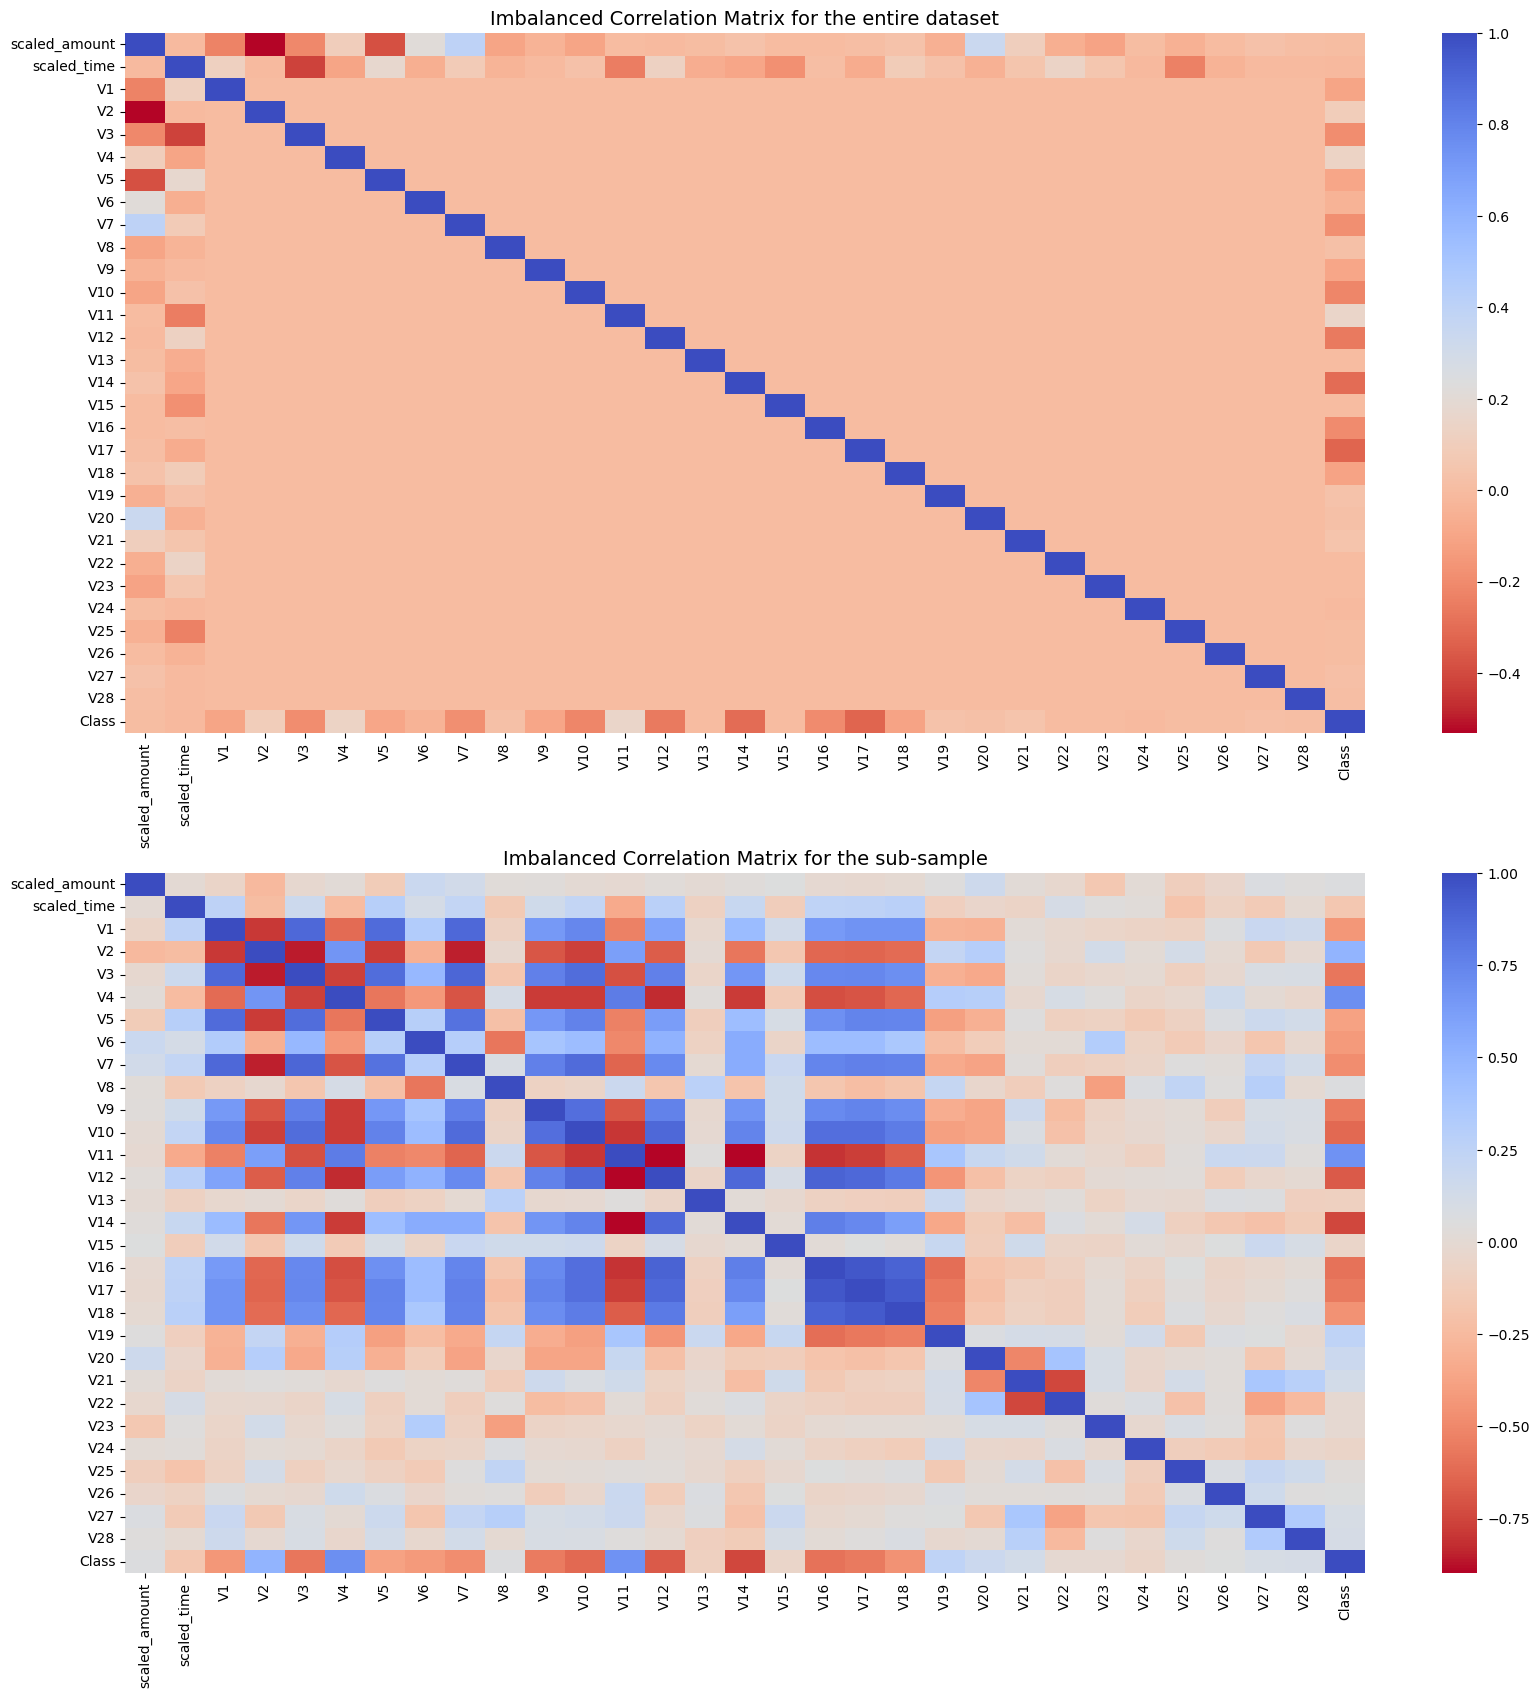

In [15]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))

corr=dt.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix for the entire dataset", fontsize=14)

sub_sample_corr=new_dt.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("Imbalanced Correlation Matrix for the sub-sample", fontsize=14)

plt.show()


Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

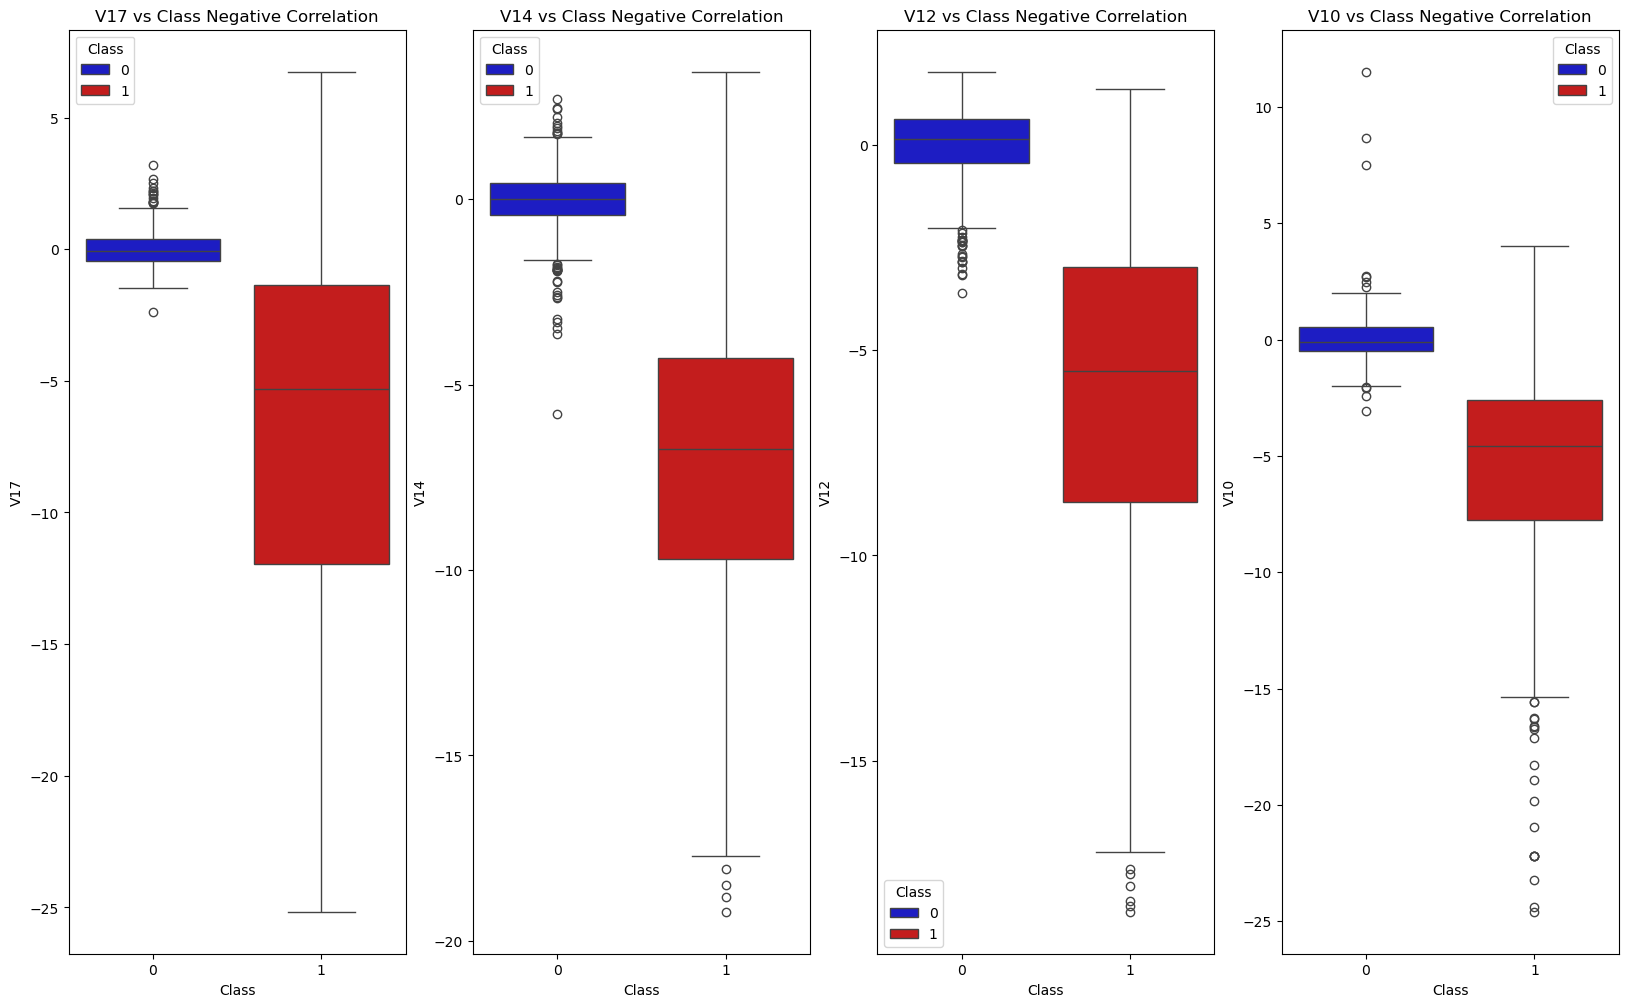

In [16]:
#NEGATIVE CORRELATION
f, axes= plt.subplots(ncols=4, figsize=(20,12))

sns.boxplot(x='Class', y='V17', data=new_dt, hue='Class', palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V14', data=new_dt, hue='Class',  palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V12', data=new_dt, hue='Class', palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V10', data=new_dt,hue='Class',  palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs Class Negative Correlation')

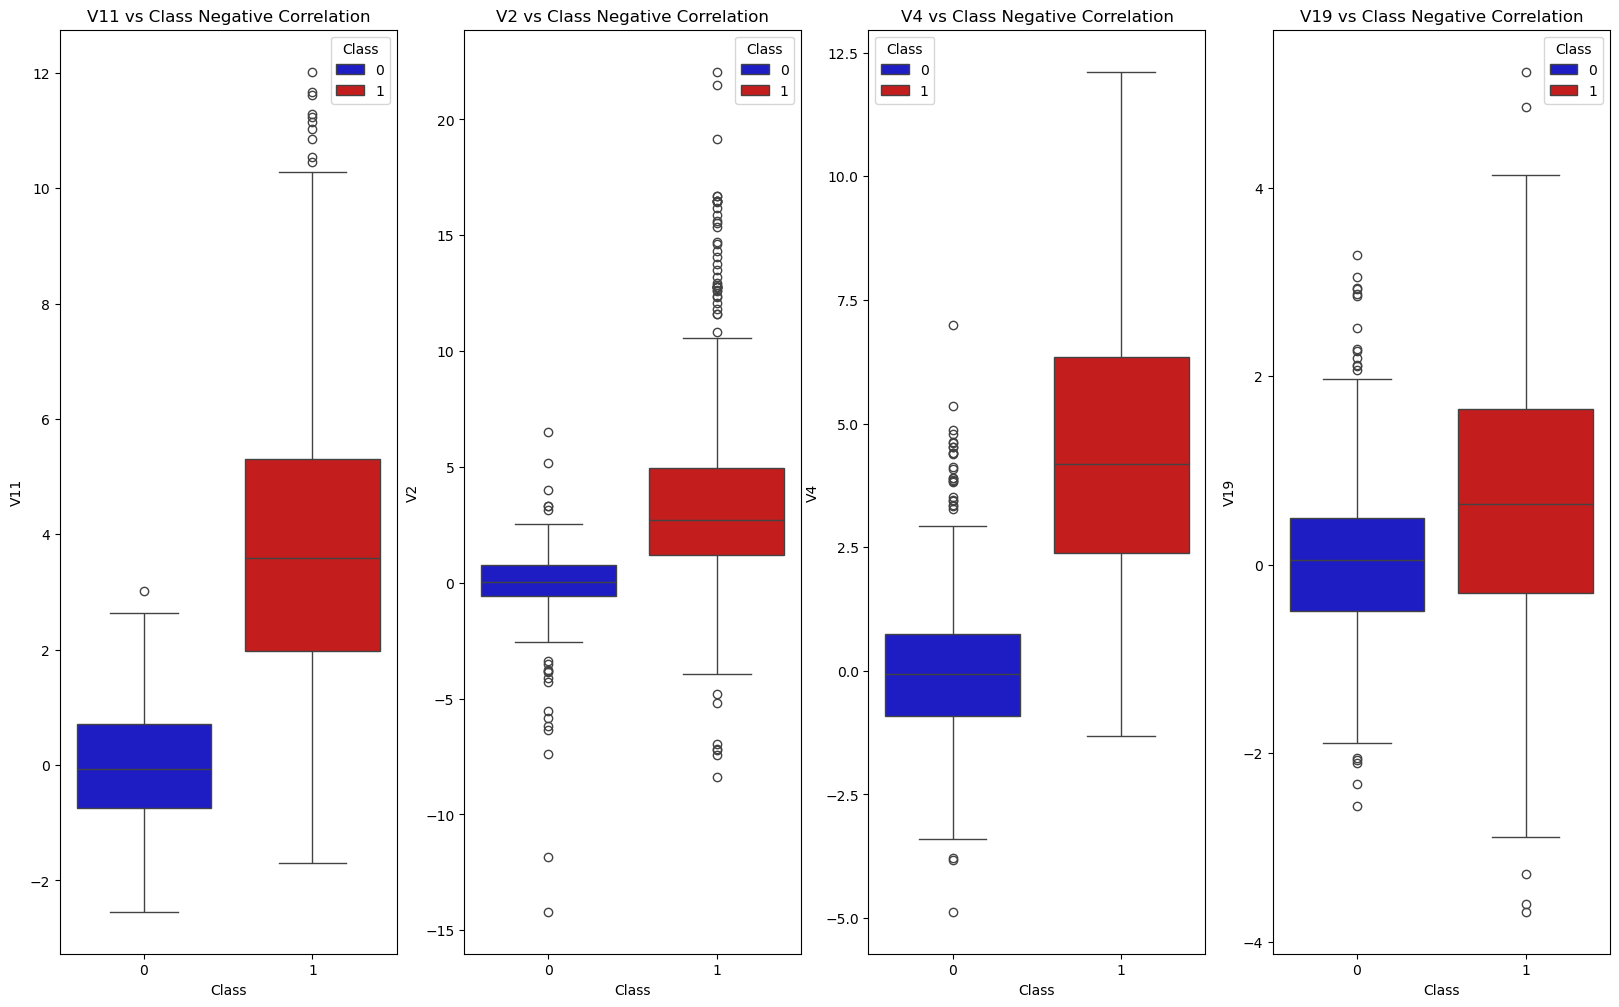

In [17]:
#POSITIVE CORRELATION
f, axes= plt.subplots(ncols=4, figsize=(20,12))

sns.boxplot(x='Class', y='V11', data=new_dt, hue='Class',  palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V2', data=new_dt, hue='Class', palette=colors, ax=axes[1])
axes[1].set_title('V2 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V4', data=new_dt, hue='Class', palette=colors, ax=axes[2])
axes[2].set_title('V4 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V19', data=new_dt, hue='Class', palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Negative Correlation')

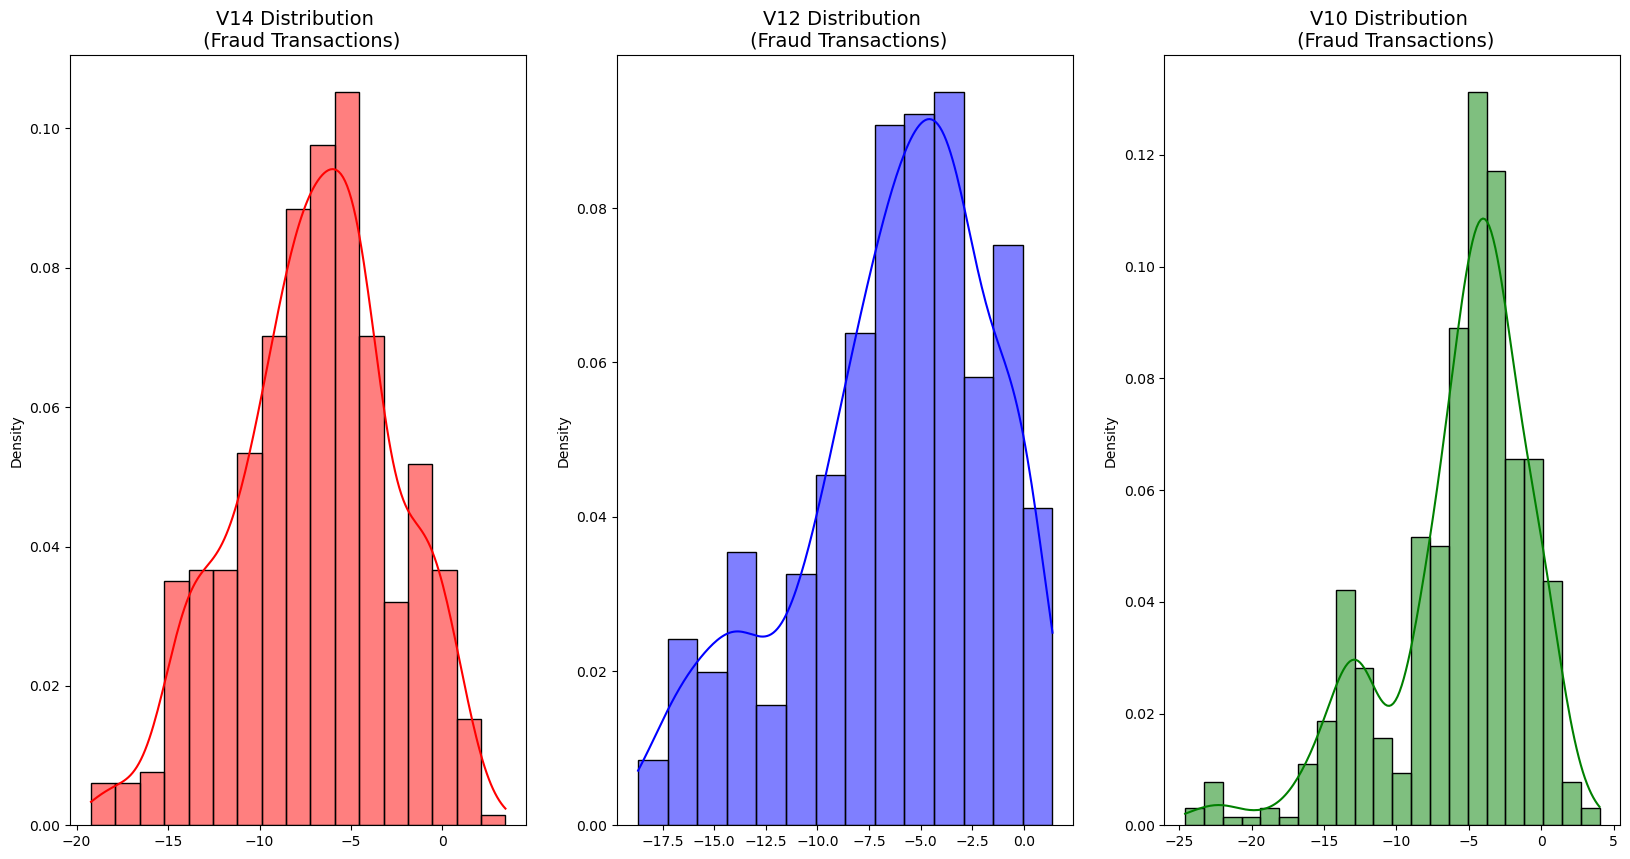

In [18]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# V14 Fraud Distribution
v14_fraud_dist = new_dt['V14'].loc[new_dt['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, stat="density", color="red", line_kws={"color": "black"})
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# V12 Fraud Distribution
v12_fraud_dist = new_dt['V12'].loc[new_dt['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, stat="density", color="blue", line_kws={"color": "black"})
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# V10 Fraud Distribution
v10_fraud_dist = new_dt['V10'].loc[new_dt['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, stat="density", color="green", line_kws={"color": "black"})
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [19]:
v14_fraud = new_dt['V14'].loc[new_dt['Class']==1].values
q25,q75= np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75) #quartiles
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr=q75-q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off=v14_iqr*1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers=[x for x in v14_fraud if (x < v14_lower or x > v14_upper)]
print('Feature V14 has outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
print('\n')
new_dt=new_dt.drop(new_dt[(new_dt["V14"]>v14_upper) | (new_dt["V14"]<v14_lower)].index)

v12_fraud = new_dt['V12'].loc[new_dt['Class']==1].values
q25,q75= np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75) #quartiles
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr=q75-q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off=v12_iqr*1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers=[x for x in v12_fraud if (x < v12_lower or x > v12_upper)]
print('Feature V12 has outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))
print('\n')
new_dt=new_dt.drop(new_dt[(new_dt["V12"]>v12_upper) | (new_dt["V12"]<v12_lower)].index)

v10_fraud = new_dt['V10'].loc[new_dt['Class']==1].values
q25,q75= np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75) #quartiles
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr=q75-q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off=v10_iqr*1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

outliers=[x for x in v10_fraud if (x < v10_lower or x > v10_upper)]
print('Feature V10 has outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))
print("\n")
new_dt=new_dt.drop(new_dt[(new_dt["V10"]>v10_upper) | (new_dt["V10"]<v10_lower)].index)

print('Number of Instances after outliers removal: {}'.format(len(new_dt)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 has outliers for Fraud Cases: 4
V14 outliers:[np.float64(-18.8220867423816), np.float64(-18.0499976898594), np.float64(-19.2143254902614), np.float64(-18.4937733551053)]


Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 has outliers for Fraud Cases: 4
V12 outliers:[np.float64(-18.5536970096458), np.float64(-18.0475965708216), np.float64(-18.6837146333443), np.float64(-18.4311310279993)]


Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
iqr: 4.954797397665595
Cut Off: 7.432196096498393
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
Feature V10 has outliers for Fraud Cases: 27
V10 outliers:[np.float64(-15.2399619587112), np.float64(-18.91

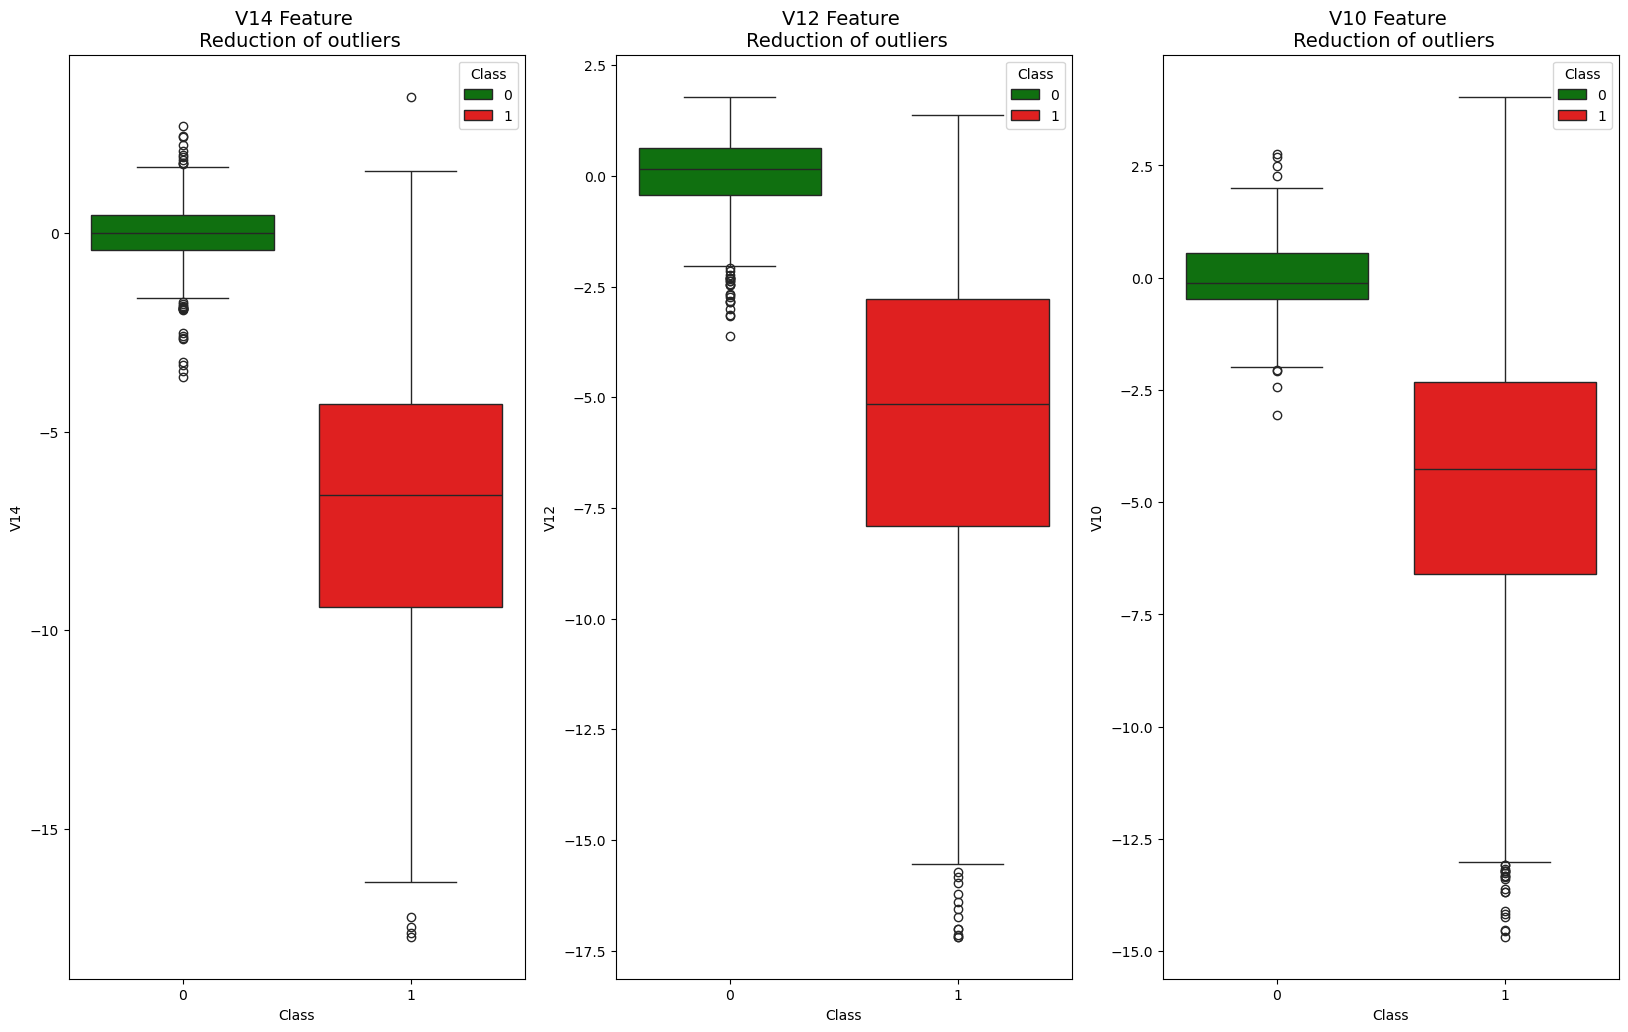

In [20]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,12))

colors = ['green', 'red']
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_dt,ax=ax1, hue='Class', palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_dt, ax=ax2, hue='Class',  palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_dt, ax=ax3, hue='Class', palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

In [21]:
X = new_dt.drop("Class", axis=1)
y=new_dt['Class']

#t-SNE implementation
t0=time.time()
X_reduced_tsne=TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1=time.time()
print("t-NSE took {:.2} s.".format(t1-t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


t-NSE took 2.5 s.
PCA took 0.0013 s


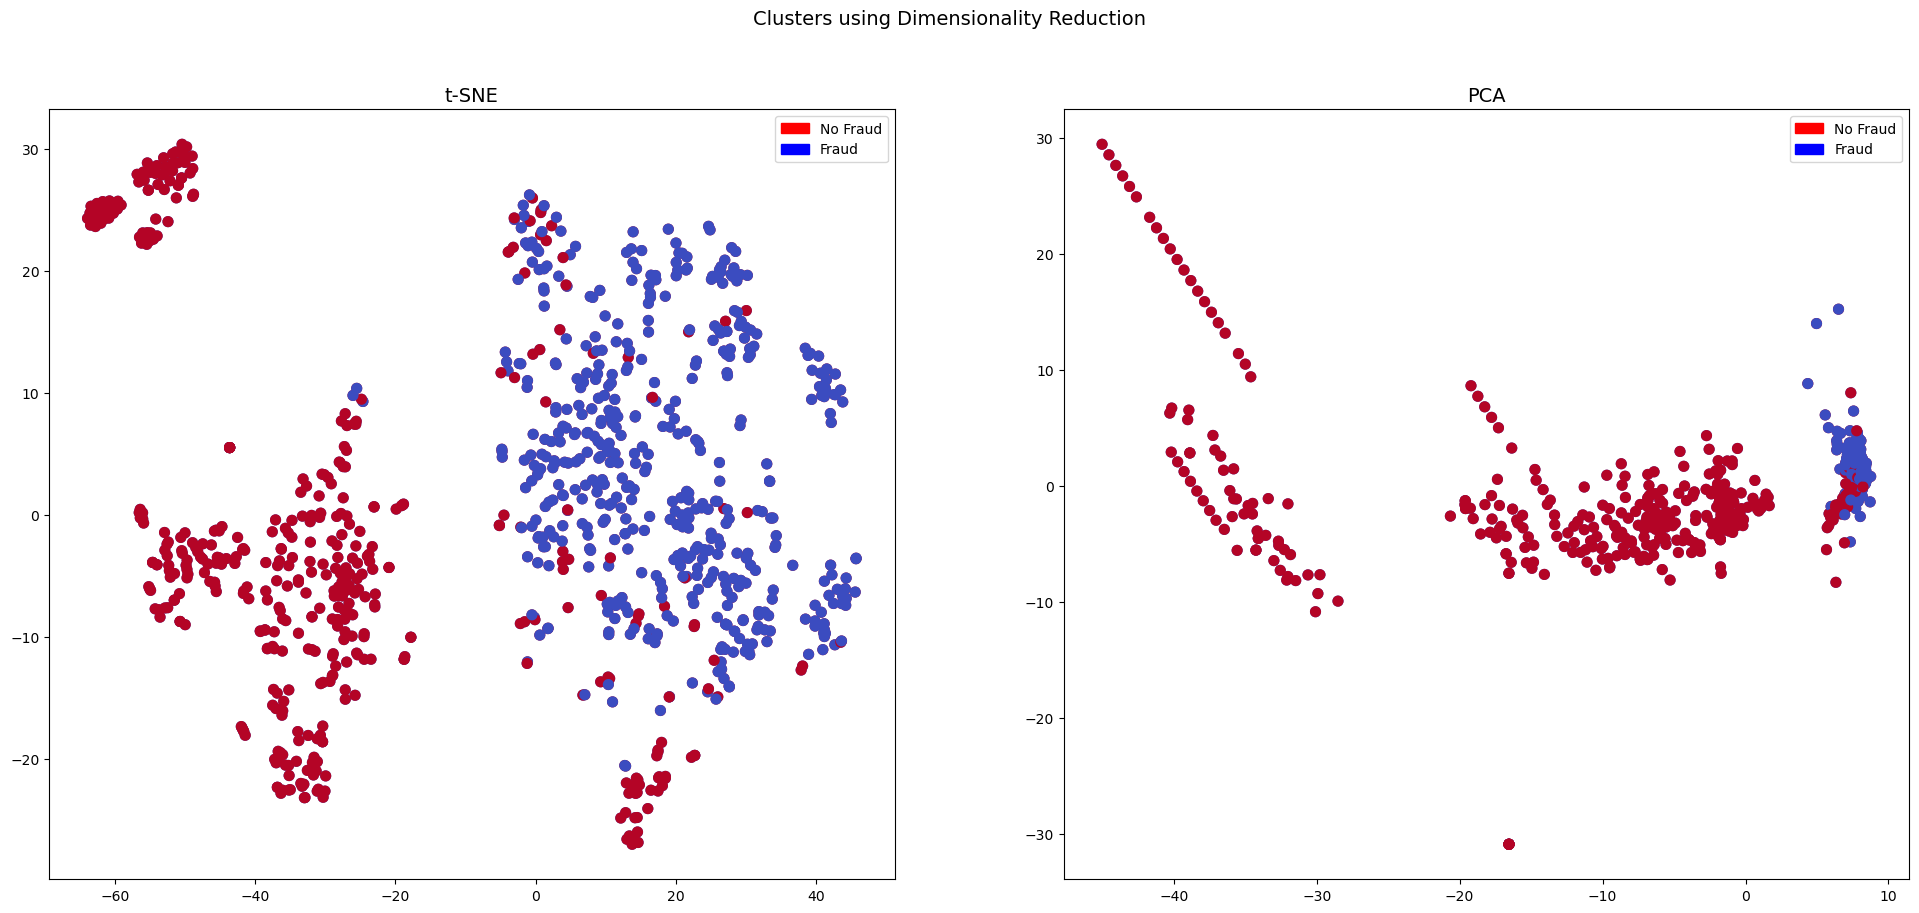

In [22]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(24,10))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

#t-SNE
blue_patch = mpatches.Patch(color='red', label='No Fraud')
red_patch = mpatches.Patch(color='blue', label='Fraud')

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y ==0), cmap= 'coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title ('t-SNE', fontsize=14)

ax1.legend(handles=[blue_patch, red_patch] )

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)


ax2.legend(handles=[blue_patch, red_patch])


## Predictions

In [23]:
X = new_dt.drop('Class', axis=1)
y = new_dt['Class']

X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2, random_state=42)

X_train.to_csv('../data/splits/X_train.csv', index=False)
y_train.to_csv('../data/splits/y_train.csv', index=False)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
classifiers={
    'Logistic-Regression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'Support-Vector-Classifier': SVC(),
    'Decision-Tree-Classifier': DecisionTreeClassifier()
}

In [25]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score= cross_val_score(classifier, X_train, y_train, cv=5)

    print(f"Classifiers: {classifier.__class__.__name__}, has a training score of {round(training_score.mean(),2)*100}% accuracy.\n")


Classifiers: LogisticRegression, has a training score of 93.0% accuracy.

Classifiers: KNeighborsClassifier, has a training score of 94.0% accuracy.

Classifiers: SVC, has a training score of 93.0% accuracy.

Classifiers: DecisionTreeClassifier, has a training score of 89.0% accuracy.



In [26]:
# LOGISTIC REGRESSION
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=6000), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# K-NEAREST NEIGHBORS
knears_params = {
    "n_neighbors": list(range(2, 10, 1)), 
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# SUPPORT VECTOR CLASSIFIER
svc_params = {
    "C": [0.5, 0.7, 0.9, 1, 10], 
    "kernel": ['rbf', 'poly', 'sigmoid', 'linear']
}

grid_svc = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DECISION TREE CLASSIFIER
tree_params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(2, 10, 1)), 
    "min_samples_leaf": list(range(1, 10, 1))
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [27]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.25%
Knears Neighbors Cross Validation Score 94.44%
Support Vector Classifier Cross Validation Score 93.91%
DecisionTree Classifier Cross Validation Score 91.01%


In [28]:
# We will undersample during cross validating
undersample_X = dt.drop('Class', axis=1)
undersample_y = dt['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) 
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 57372 57772 58399]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 113923 113924 113925]
Train: [     0      1      2 ... 284804 284805 284806] Test: [112753 113283 113926 ... 173144 173225 173850]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170881 170882 170883 ... 229430 230022 230957]
Train: [     0      1      2 ... 229430 230022 230957] Test: [227840 227841 227842 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


In [29]:
# Let's Plot LogisticRegression Learning Curve
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(30,20), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

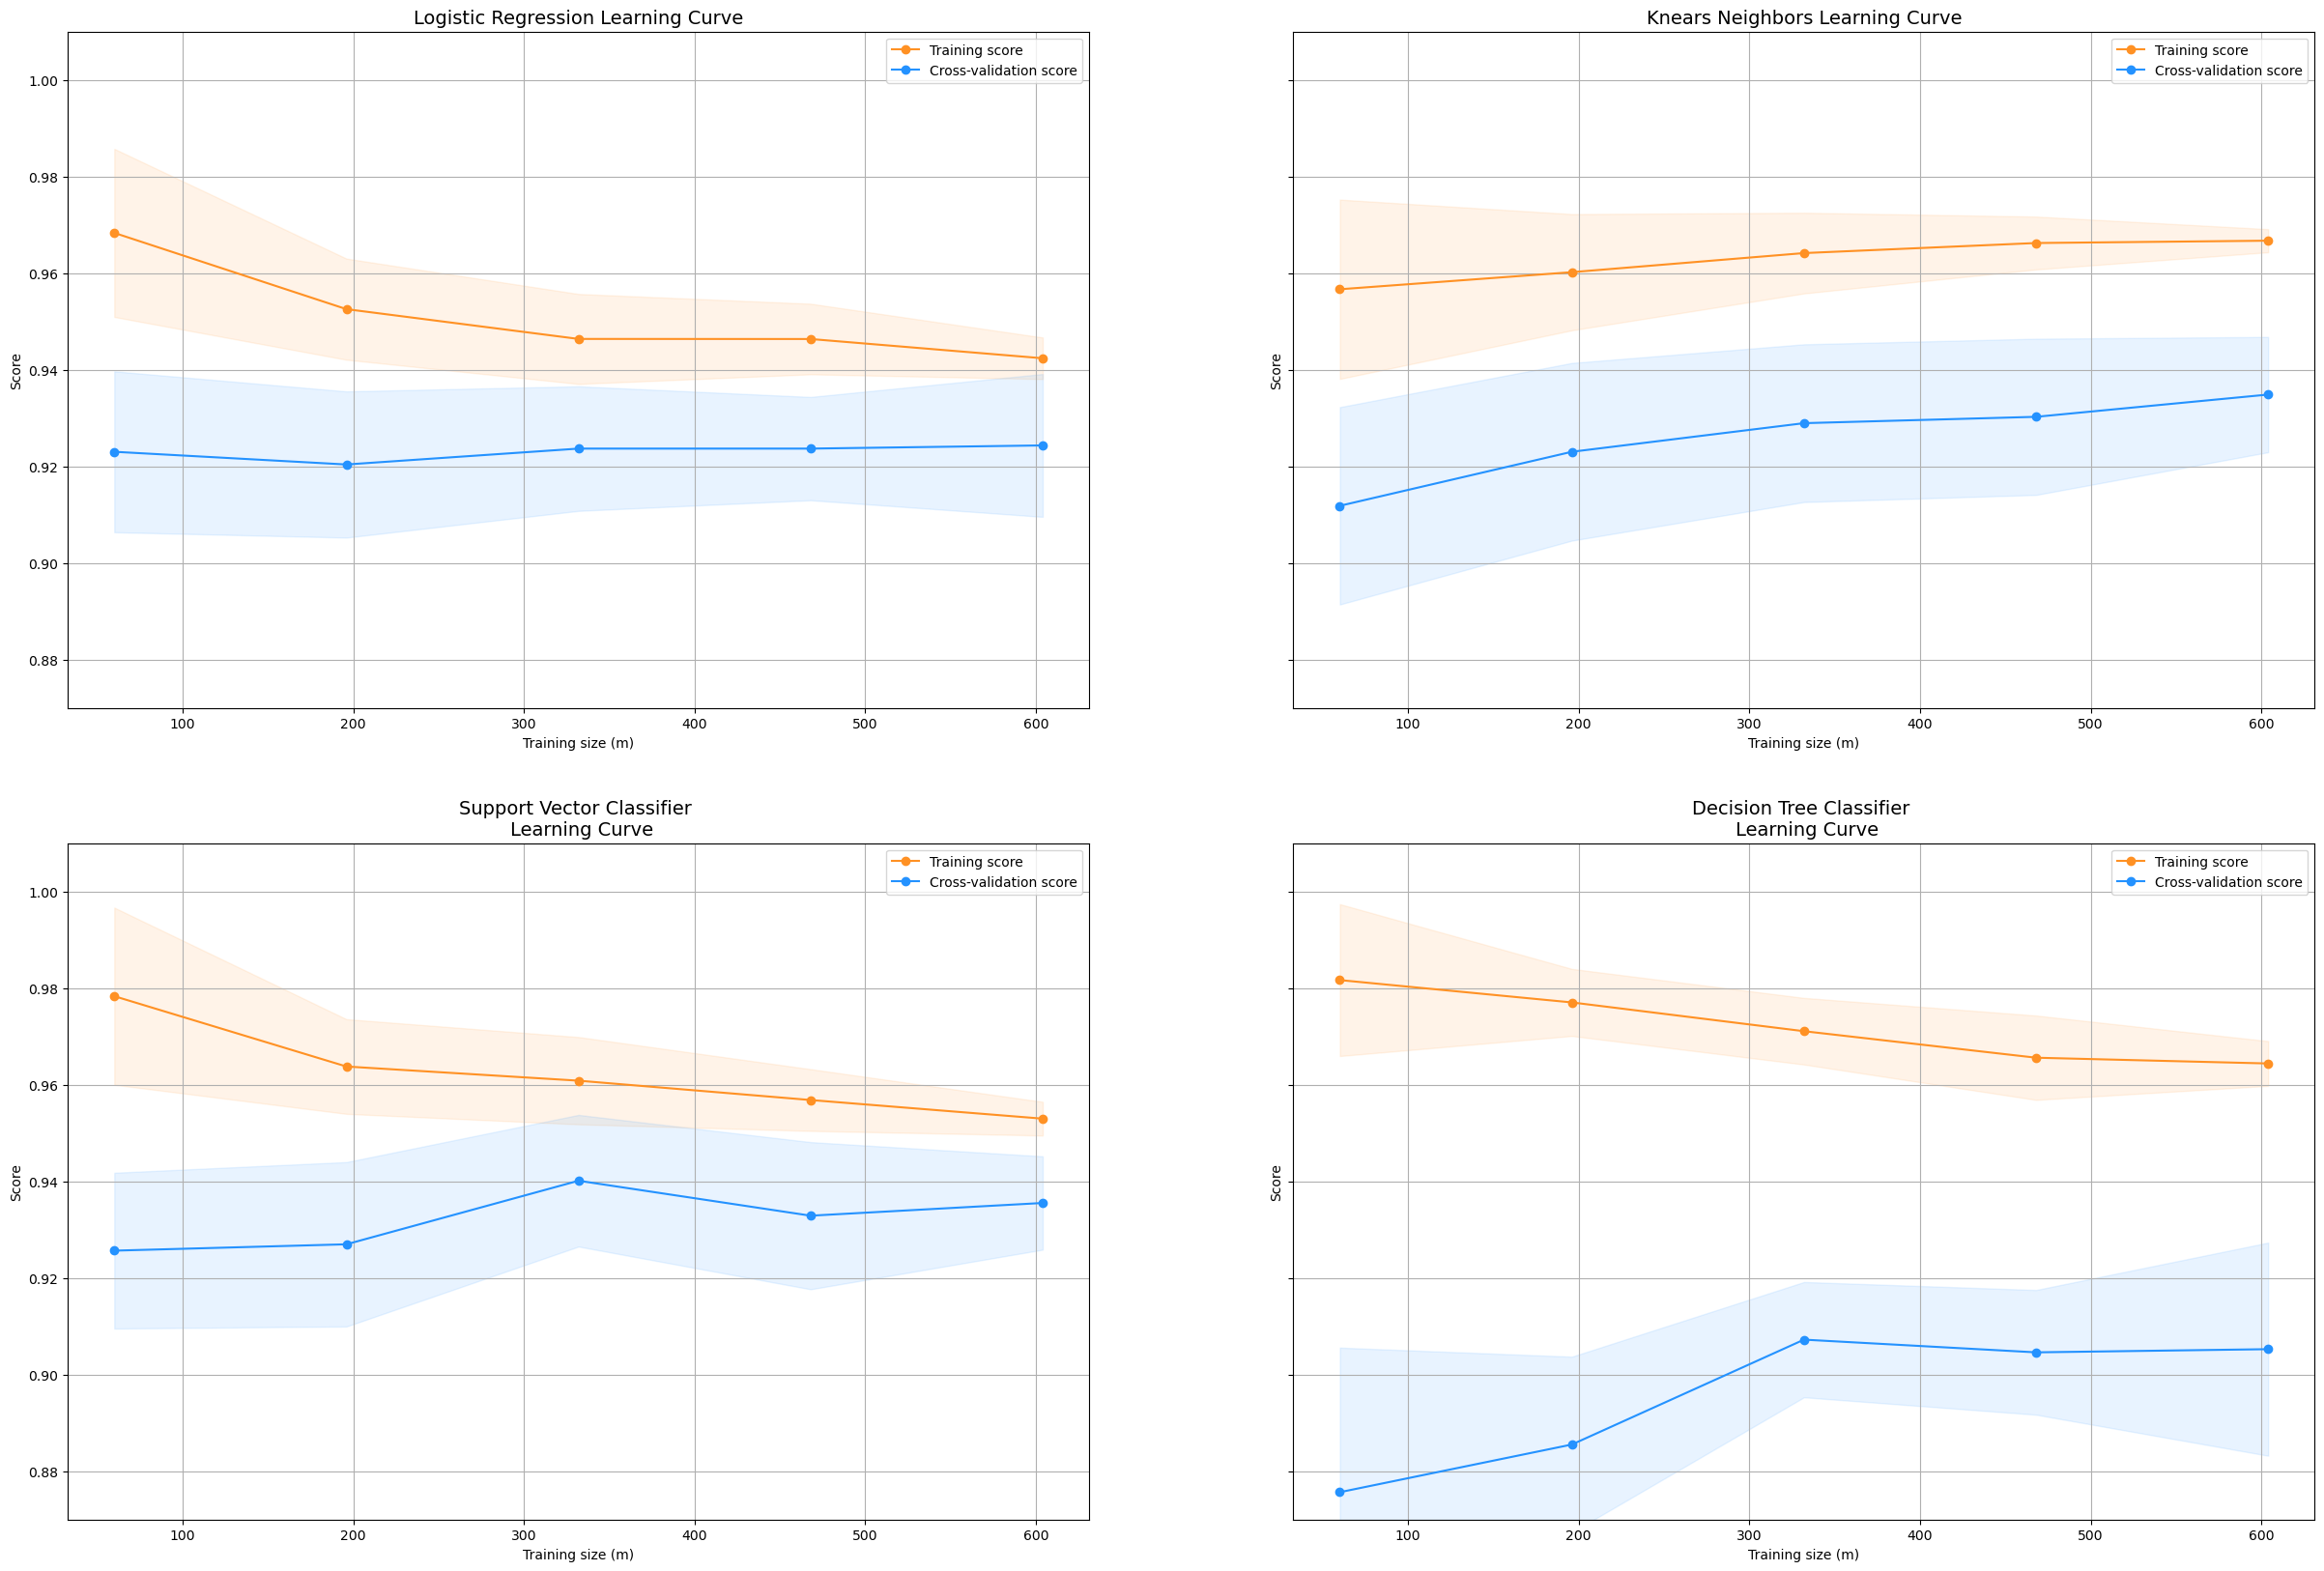

In [30]:
cv = ShuffleSplit(n_splits=10,
                  test_size=0.2,
                  random_state=42)

plot_learning_curve(log_reg,
                    knears_neighbors,
                    svc,
                    tree_clf,
                    X_train,
                    y_train,
                    (0.87, 1.01),
                    cv=cv,
                    n_jobs=4);

In [31]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [32]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9725256630347194
KNears Neighbors:  0.9431944785061136
Support Vector Classifier:  0.9772974109238692
Decision Tree Classifier:  0.9093087622184073


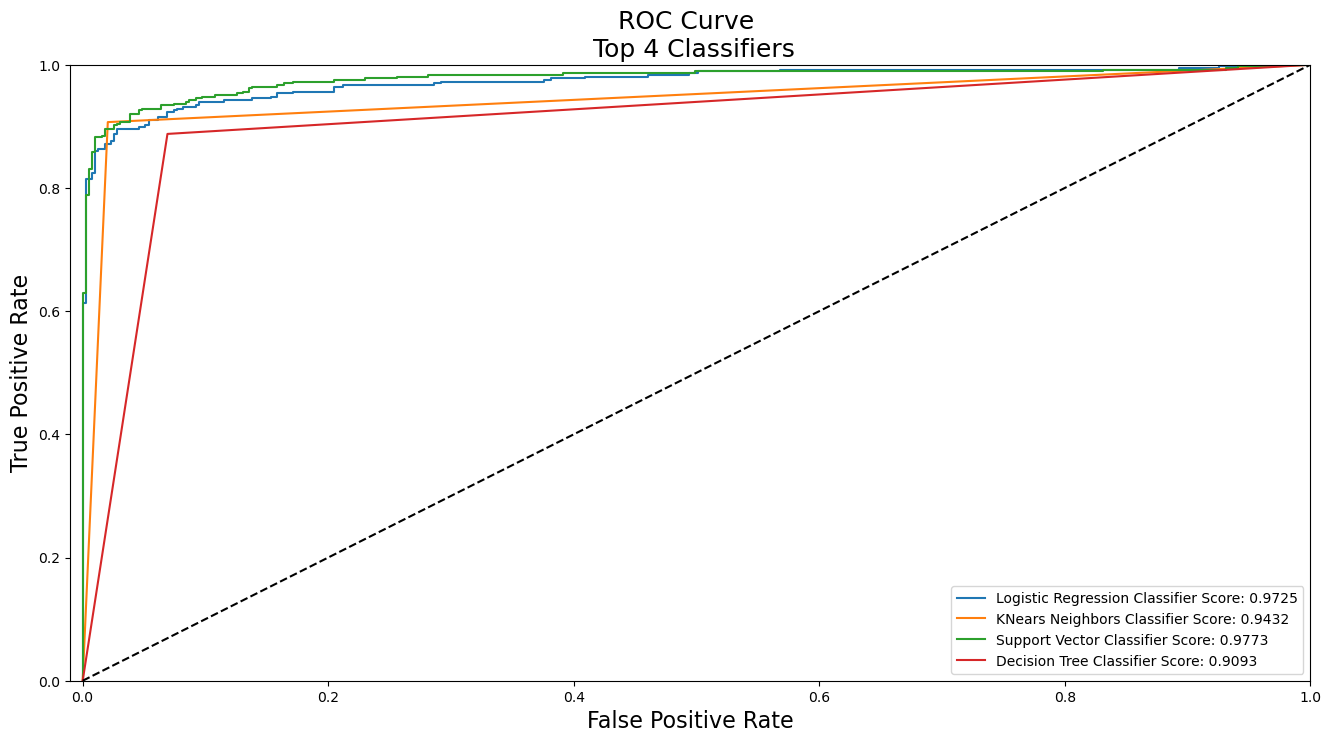

In [33]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

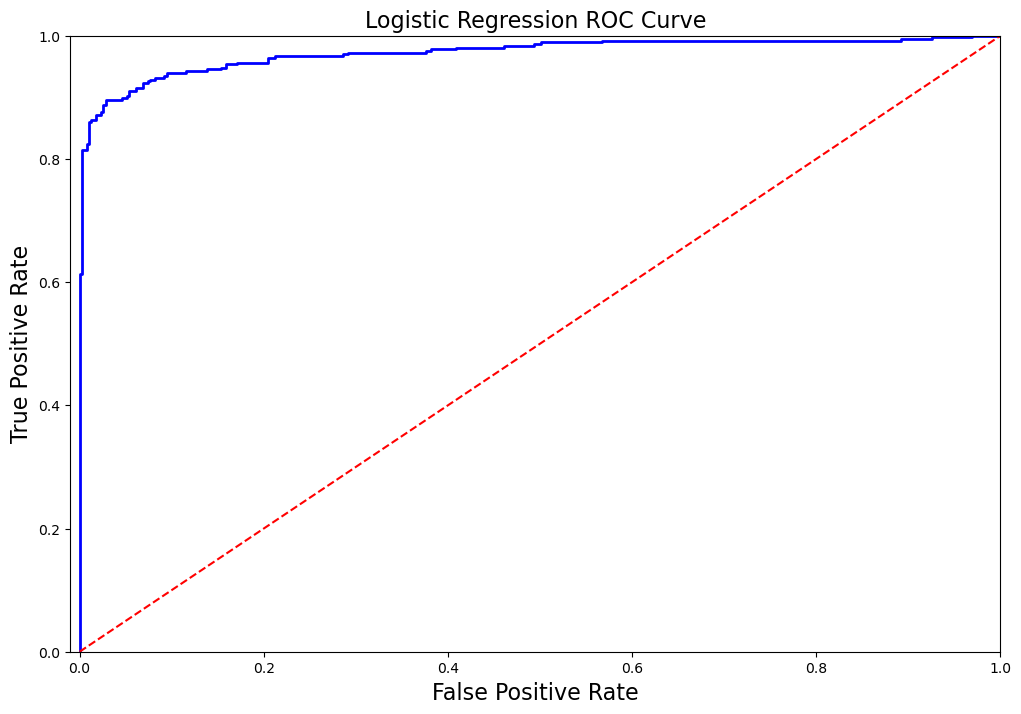

In [34]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [35]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [36]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.87
Precision Score: 0.88
F1 Score: 0.88
Accuracy Score: 0.88
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.83
Precision Score: 0.00
Recall Score: 0.18
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [37]:
undersample_y_score = log_reg.decision_function(original_Xtest)
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.12


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.12')

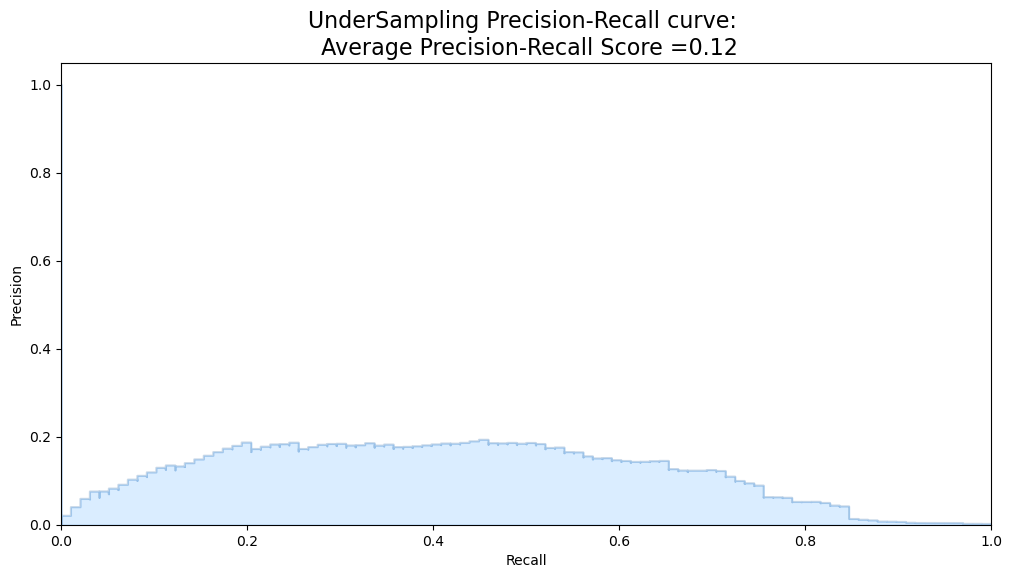

In [38]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [39]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter  = 1000), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ['saga']}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9497911675736462
precision: 0.059771546985923144
recall: 0.9111976630963973
f1: 0.11054792485278715
---------------------------------------------------------------------------------------------------------------------------------------


In [40]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [41]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


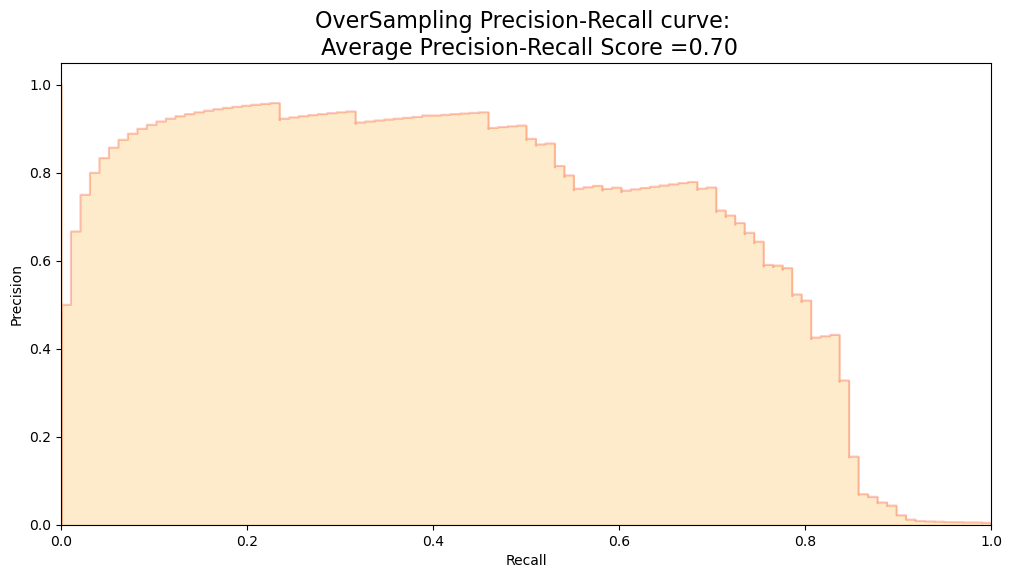

In [43]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()

In [44]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

pd.DataFrame(Xsm_train).to_csv('../data/splits/Xsm_train.csv', index=False)
pd.DataFrame(ysm_train).to_csv('../data/splits/ysm_train.csv', index=False)

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.3703081607818604 sec


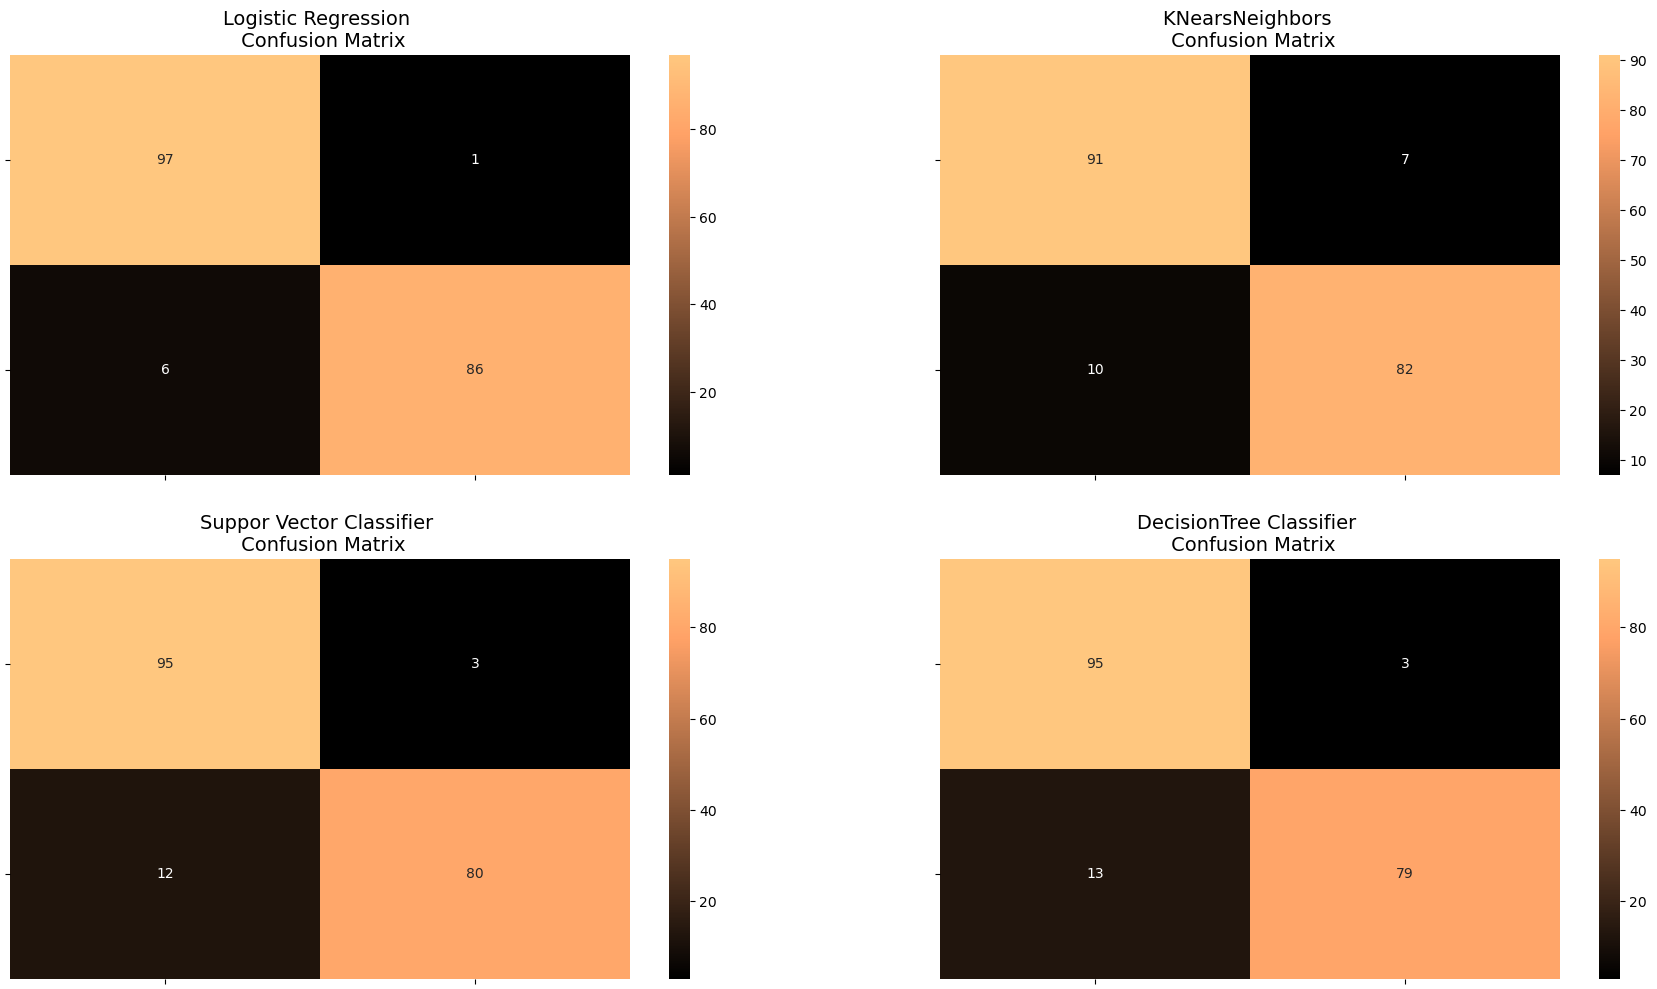

In [45]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [46]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.99      0.93      0.96        92

    accuracy                           0.96       190
   macro avg       0.97      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.92      0.89      0.91        92

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        98
           1       0.96      0.87      0.91        92

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted

In [47]:
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.963158
1,Oversampling (SMOTE),0.986113
